# 차원 축소

## 고차원 데이터

- 변수의 수가 많음 -> 불필요한 변수 존재
- 시각적으로 표현하기 어려움
- 계산 복잡도 증가 -> 모델링 비효율적
- 중요한 변수만을 선택 -> 효율적

## 변수선택/추출을 통한 차원 축소

- 변수 선택 : 분석 목적에 부합하는 소수의 예측변수만을 선택
    - 장점 : 선택한 변수 해석 용이
    - 단점 : 변수간 상관관계 고려 어려움
    - 지도학습 : 정보이득, stepwise, LASSO, Genetic algorithm...
    - 비지도학습 : PCA loading

- 변수 추출 : 예측변수의 변환을 통해 새로운 변수 추출
    - 장점 : 변수간 상관관계 고려, 일반적으로 변수의 개수를 많이 줄일 수 있음 
    - 단점 : 추출된 변수의 해석이 어려움
    - 지도학습 : PLS
    - 비지도학습 : PCA, Wavelets transforms, Autoencoder

## Principal Components Analysis(주성분분석)
- 개요
    - 고차원 데이터를 효과적으로 분석하기 위해 기존 변수의 선형조합을 이용하여 변수를 추출하는 대표적 분석 기법
    - 차원축소 -> 시각화, 군집화, 압축, 해석
    - n개의 관측치와 p개의 변수로 구성된 데이터 -> 상관관계가 없는 k개의 변수로 구성된 데이터(n개의 관측치)로 요약
    - 원래 데이터의 분산을 최대한 보존하는 새로운 축을 찾음 -> 그 축에 데이터를 사영
    - 일반적으로 PCA는 전체 분석 과정 중 초기에 사용(어떤 데이터인지 궁금할 때/모델링 할 때)
    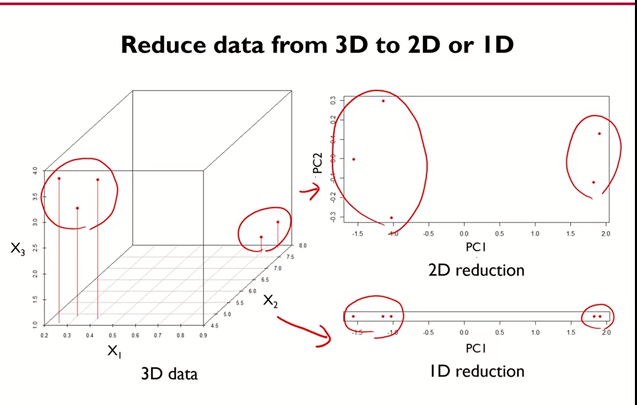

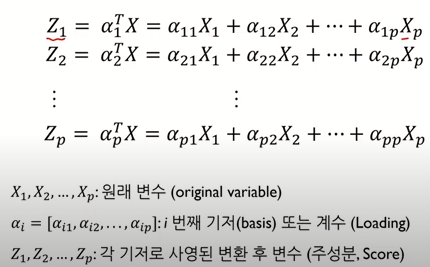

PCA 변수 추출을 이용하여 생긴 변수 -> Z1, Z2, Z3 ...   
Z는 원래 변수의 모든 선형결합으로 생긴 변수 -> 각 변수마다 선형 결합의 방법(계수)가 다름  
a -> 각 선형 결합에서의 계수
- 효율적인 계산을 위해 고유값과 고유벡터를 사용해서 계산하겠다!

- 아래 2차원 데이터를 두 개의 축에 사영시켰을 때, 우측 기저가 좌측 기저에 비해 손실되는 정보의 양(분산이 줄어드는 정도)가 적으므로 더 선호되는 기저
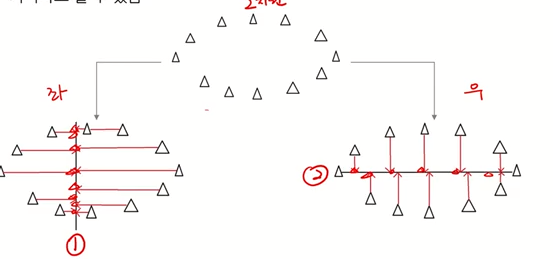

## PCA 수리적 배경

- mean vector : 각 feature마다의 평균을 담고있는 벡터
- covariance matrix
    - 대각 원소 : 각 feature의 분산 
        - 데이터의 분산 : 대각원소들의 합
    - 나머지 원소 : 각 feature의 공분산 
        - 
- correlation matrix
    - 대각 원소 : 자기 자신과의 상관계수(항상 1)
    - 나머지 원소 : 각 feature의 상관계수
- **사영** : 한 벡터 b를 다른 벡터 a에 사영시킨다는 것은 b벡터로부터 a 벡터에 수직인 점까지의 길이를 가지며, 벡터 a와 같은 방향을 갖는 벡터를 찾는다는 것을 의미
    - 벡터 b를 a에 사영시켰을 때의 크기를 찾고, 벡터 a의 방향(크기를 제거한)을 곱해주면 사영 벡터
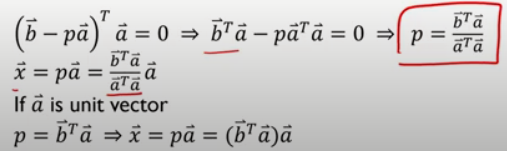

- **고유값 및 고유벡터** : 어떤 행렬 A에 대해 상수와 벡터가 다음 식을 만족할 때, 상수와 x를 각각 행렬 A의 고유값 및 고유벡터라고 함
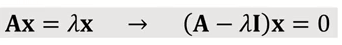
- 벡터에 행렬을 곱하여 벡터를 선형변환
- 고유벡터는 이 변환에 의해 방향이 변하지 않는 벡터
- 해당 식을 만족하는 0이 아닌 x벡터를 찾으려면, (A-aI)가 역행렬이 존재하지 않아야 함. del()의 값이 0이 되어야 함.
- 만약 A의 고유값이 존재한다면 해당 방정식의 차수가 p차수이기 때문에 p개의 고유값이 존재

## PCA 알고리즘

- X의 선형결합으로 Z를 생성할건데, 이 때 Z의 분산을 최대화하는 알파를 찾겠다.
- Z는 X의 선형결합으로 이루어진다.
- Var(aTX) 에서의 aT가 Var()밖으로 나오면서 제곱의 형태로 나오게 됨 -> aTVar(X)a = at시그마a
- 제약조건 : a의 놈은 1이다.
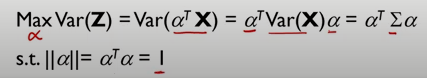

- E : 고유벡터를 열벡터로 하는 행렬
- 공분산행렬 : m개의 feature을 가지는 행렬
    - 대칭행렬이기 때문에 항상 고유값 분해가 가능하고
    - 고유값 분해를 했을 때, E가 직교행렬이 나옴
- ^ : 각 고유값을 대각원소로 하는 행렬
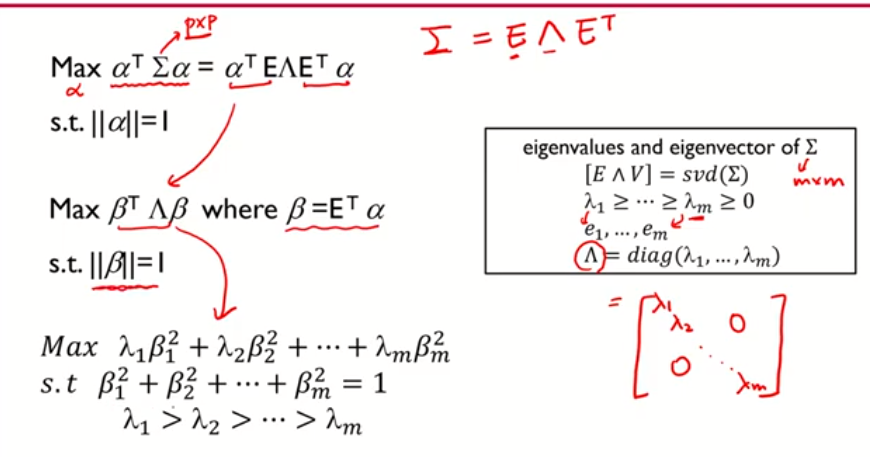
- a의 제약조건이 놈이 1인 이유 : 최대화하는 a의 조합을 찾아야 하는데, 그 때마다 a의 총합이 바뀌면 안되기 때문에
- b의 제약조건이 놈이 1인 이유도 마찬가지
- b1이 1일 때 해당 식이 최대화
- 첫번째 최적 a는 가장 큰 고유값에 대응되는 고유벡터
    - 대칭행렬이기 때문에 다른 고유벡터들과 해당 고유벡터를 곱했을 때 값 = 0
    - 고유벡터의 놈을 1로 맞추기 때문에 해당 고유벡터를 내적했을 때 값 = 1
- 두번째 최적 a는 두번째로 큰 고유값에 대응되는 고유벡터
- 세번째 최적 a는 세번째로 큰 고유값에 대응되는 고유벡터

## PCA - 예제

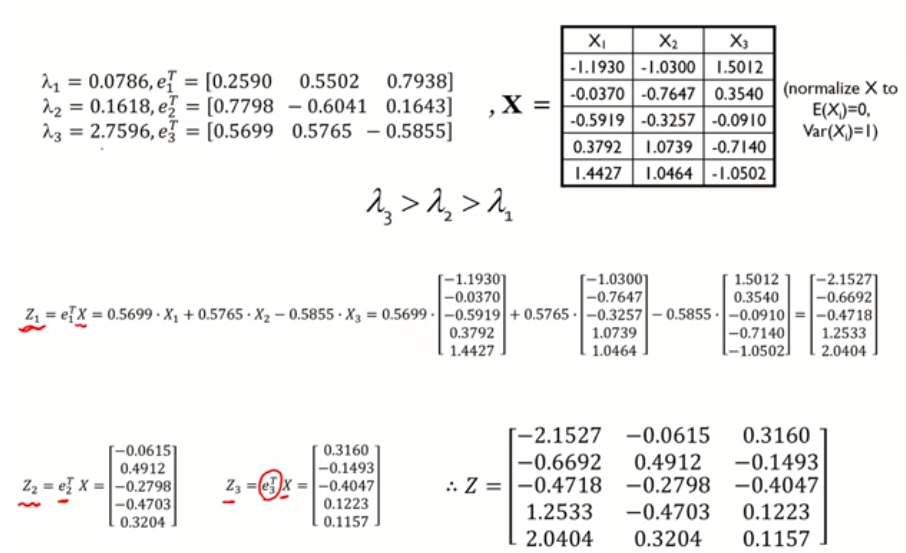

- 첫번째 z는 가장 큰 고유값으로, 두번째 z는 두번째로 큰 고유값의 계수를 이용하여 선형결합을 통해 만듦
    - z간의 직교, 선형독립(각각이 하나의 축이 됨)을 만들기 위해서 각각의 고유벡터를 계수로 하는 것
    - Z의 covariance matrix의 비대각원소의 값은 0
    - 주성분(Z)들은 서로 독립(직교하기 때문에)
    - 각각 직교, 독립이어야 데이터를 가장 잘 분포시키고, 폭넓게 가장 잘 설명할 수 있음
- 이론적으로 원래 feature 개수인 p개 까지의 새로운 변수를 얻을 수 있음

## 주성분 선택하기

- **X의 covariance matrix의 고유값 = 각 주성분의 분산**
- 모든 고유값의 합에서 해당 주성분을 만들 때 사용한 고유값이 차지하는 비율이 큰 주성분들을 선택하면 됨.
    - 해당 비율이 전체 데이터에서 해당 주성분이 설명할 수 있는 정도(해당 주성분이 담고 있는 정보의 양)
        - 전체 feature을 사용했을 때의 총분산 -> 모든 feature을 사용하였을 때의 해당 data의 정보의 양
        - 해당 주성분의 분산 -> 해당 주성분을 사용하였을 때의 해당 data의 정보의 양
    - ex) 해당 주성분의 분산이 차지하는 비율이 90.5%라면 해당 주성분의 분산이 데이터를 설명할 수 있는 저옫 90.5%


1. 선택방식1 : 고유값 감소율이 유의미하게 낮아지는 Elbow point까지 해당하는 주성분 수를 선택
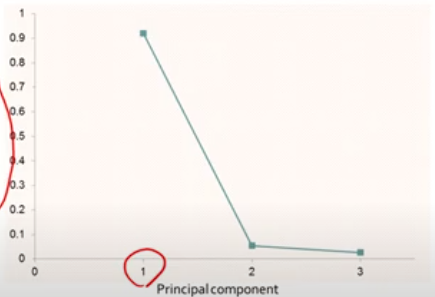 -> 여기서는 1~2개
2. 선택방식2 : 일정 수준 이상의 분산비를 보존하는 최소의 주성분을 선택(보통 70% 이상)
3. 선택방식3 : 시각화가 목적이라면 3차원까지 선택해주는 것도 가능

## PCA Loading Plot

- 각 주성분은 원래 feature의 선형결합으로 이루어짐.
- 각 주성분을 만들 때에 사용된 각 feature의 계수를 살펴봄으로써 각 feature의 주성분에 끼친 영향도를 알아봄
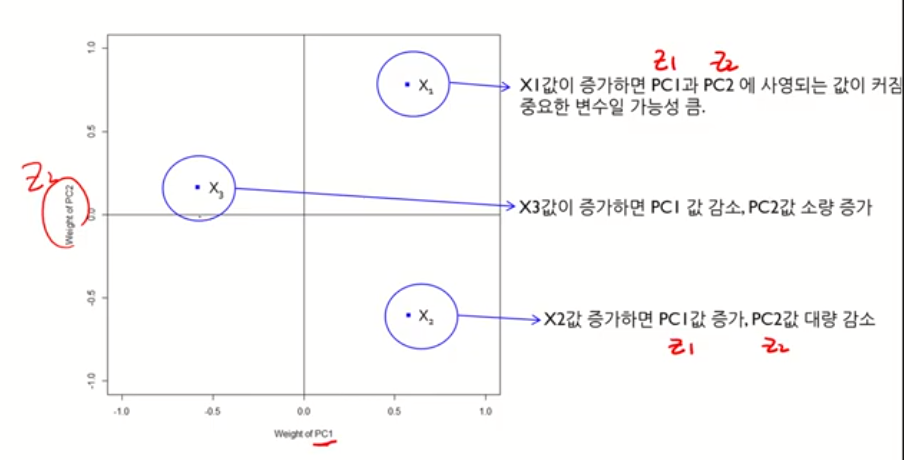

## PCA 알고리즘 - 요약
### 단계
1. 데이터 정규화(mean centering)
    - 스케일에 의한 분산의 차이를 없애주기 위해서
1. 기존 변수의 covariance(correlation) matrix 계산
    - 정규화를 하면 covariance와 correlation matrix가 동일
    - 정규화를 안했으면 스케일에 의한 분산의 차이를 없애주기 위해서 correlation matrix를 사용해주어야 함
1. covariance(correlation) matrix로부터 고유값 및 이에 해당되는 고유벡터를 계산
1. 고유값 및 해당되는 고유벡터를 순서대로 나열
1. 정렬된 고유값을 토대로 기존 변수를 변환

### 특징
- 공분산 행렬의 고유벡터를 사용하므로 단일 가우시안 분포로 추정할 수 있는 데이터에 대해 서로 독립적인 축을 찾는데 사용할 수 있음

### 한계점
- 데이터의 분포가 가우시안이 아니거나 다중 가우시안에 대해서는 적용하기 어려움
    - 상관관계는 선형 관계만을 포착할 수 있기 때문
    - 대안 : 커널 PCA, LLE
- 분류/예측 문제에 대해서 데이터의 범주 정보를 고려하지 않기 때문에(비지도 학습) 범주간 구분이 잘 되도록 변환을 해주는 것이 아님
    - 주성분분석은 단순히 변환된 축이 최대 분산방향과 정렬되도록 좌표회전을 수행함(각 축이 직교하기 때문에 회전에 해당)
    - 대안 : Partial Least Square

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 판다스 데이터프레임으로 변환
columns = ["sl","sw","pl","pw"]
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF["target"]=iris.target
irisDF.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


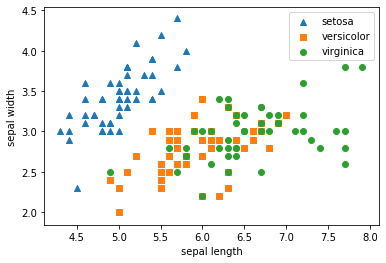

In [4]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ["^","s","o"]

for i, marker in enumerate(markers):
    x_axis_data = irisDF[iris["target"]==i]["sl"]
    y_axis_data = irisDF[iris["target"]==i]["sw"]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

[0.72962445 0.22850762 0.03668922 0.00517871]


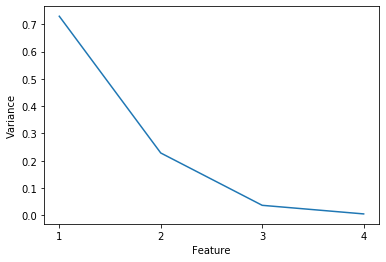

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

pca = PCA()
pca = pca.fit(iris_scaled)
print(pca.explained_variance_ratio_)
# 더했을 때 70~90% 정도 되는 것 까지 사용해주면 됨!

irisDF = pd.DataFrame({"Variance":pca.explained_variance_ratio_,"Feature":["1","2","3","4"]})
sns.lineplot("Feature", "Variance", data=irisDF)

# 변동성 곡선이 꺾이는 지점 바로 앞의 주성분 개수 선택

In [17]:
pca = PCA(n_components=2) # PCA로 변환할 차원의 수

# fit()과 transform()을 호출하여 pca변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [18]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ["pca_component_1","pca_component_2"]
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca["target"]=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


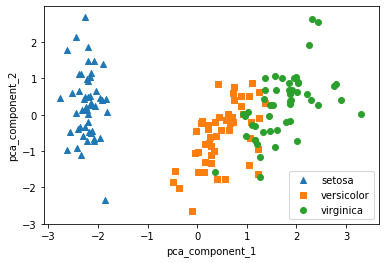

In [20]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ["^","s","o"]

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[iris["target"]==i]["pca_component_1"]
    y_axis_data = irisDF_pca[iris["target"]==i]["pca_component_2"]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel("pca_component_1")
plt.ylabel("pca_component_2")
plt.show()

In [22]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring="accuracy", cv=3)
print("원본 데이터 교차 검증 개별 정확도", scores)
print("원본 데이터 평균 정확도 :", np.mean(scores))

원본 데이터 교차 검증 개별 정확도 [0.98 0.94 0.96]
원본 데이터 평균 정확도 : 0.96


In [24]:
pca_X = irisDF_pca[["pca_component_1", "pca_component_2"]]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring="accuracy", cv=3)
print("PCA 변환 데이터 교차 검증 개별 정확도", scores_pca)
print("PCA 변환 데이터 평균 정확도", np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도 [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도 0.88
